$$\textbf{Optimización I. Tarea 4}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{purple}{Librerías \space }$ <br>

In [25]:
import numpy as np
import matplotlib.pyplot as plt



In [26]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)

Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


In [27]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


In [28]:
#definicion de funcion para para las graficas dee los contornos

def contornosFnc2D(fncf, puntos, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x, y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contourf(mX, mY, mZ, levels, cmap='coolwarm')
    plt.colorbar(CS, ax=ax)
    # Grafica los puntos dados
    puntos_x = [p[0] for p in puntos]
    puntos_y = [p[1] for p in puntos]
    ax.plot(puntos_x, puntos_y, 'r-',label="Sucesión")
    ax.plot(puntos_x[0], puntos_y[0], 'g*',label="punto inicial")
    ax.plot(puntos_x[-1], puntos_y[-1], 'b*',label="mínimo encontrado")
     # Grafica los puntos como puntos rojos
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Contornos de la función sucesión')
    plt.legend()
    plt.show()

In [33]:
#definicion d elas funciones de prueba para los algoritmos
def Himmelblau(x):
    x1=x[0]
    x2=x[1]
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2


def D_Himmelblau(x):
    x1=x[0]
    x2=x[1]
    gx = 4*x1*(x1**2 + x2 - 11) + 2*(x1 + x2**2 - 7)
    gy = 2*(x1**2 + x2 - 11) + 4*x2*(x1 + x2**2 - 7)
    return np.array([gx, gy])

def H_Himmelblau(x):
    x1=x[0]
    x2=x[1]
    hessiana = np.array([[12*(x1**2) + 4*x2 - 42, 4*x1 + 4*x2],
                         [4*x1 + 4*x2, 12*(x2**2) + 4*x1 - 26]])
    return hessiana


def Beale(x):
    x1=x[0]
    x2=x[1]
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*(x2**2))**2 + (2.625 - x1 + x1*(x2**3))**2

def D_Beale(x):
    x1=x[0]
    x2=x[1]    
    dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*(x2**2))*(-1 + x2**2) + 2*(2.625 - x1 + x1*(x2**3))*(-1 + x2**3)
    dx2 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*((x[0])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(2*(x[0])*(x[1])) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(3*(x[0])*(x[1])**2)
    return np.array([dx1, dx2])

def H_Beale(x):
    x1=x[0]
    x2=x[1] 
    d_x1x1 = 2 * (x2**6 + x2**4 - 2*x2**3 - x2**2 - 2*x2 + 3)
    d_x2x2 = x1 * (31.5*x2 + x1*(30*x2**4 + 3*x2**2 - 2*x2 - 2) + 9)
    d_x1x2 = 15.75*x2**2 + 9*x2 + 4*x1*(3*x2**5 + 2*x2**3 - 3*x2**2 - x2 - 1) + 3
    return [[d_x1x1, d_x1x2], [d_x1x2, d_x2x2]]



def Rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

def D_Rosenbrock(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient


def H_Rosenbrock(x):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n - 1):
        hessian[i, i] += 1200 * x[i]**2 - 400 * x[i + 1] + 2
        hessian[i, i + 1] += -400 * x[i]
        hessian[i + 1, i] += -400 * x[i]
        hessian[i + 1, i + 1] += 200
    return hessian


#definimos los parámetros de la funcion de hartman
alpha = np.array([1.0, 1.2, 3.0, 3.2])

A = np.array([[10, 3, 17, 3.5, 1.7, 8],
              [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])


P = 10**(-4) * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                          [2329, 4135, 8307, 3736, 1004, 9991],
                          [2348, 1451, 3522, 2883, 3047, 6650],
                          [4047, 8828, 8732, 5743, 1091, 381]])

def Hartman(x):
    
    sum1=0
    for k in range(4):
        sum2=0
        for j in range(6):
            sum2+=A[k][j]*((x[j]-P[k][j])**2)
        sum1+= alpha[k]*np.exp(-sum2)/1.94
    
    return -(1/1.94)*(2.58 + sum1)

def D_Hartman(x):
    
    gradient=np.zeros(6)
    for i in range(6):
        sum1=0
        for k in range(4):
            sum2=0
            for j in range(6):
                sum2+=A[k][j]*((x[j]-P[k][j])**2)
            sum1+= 2*alpha[k]*A[k][i]*(x[i] - P[k][i])*np.exp(-sum2)/1.94
        gradient[i]=sum1
  
    return gradient

def H_Hartman(x):
    
    hessian=np.zeros([6,6])
    for i in range(6):
        for l in range(i, 6):
            sum1=0
            for k in range(4):
                sum2=0
                for j in range(6):
                    sum2+=A[k][j]*((x[j]-P[k][j])**2)
                sum1+=2*alpha[k]*A[k][i]*np.exp(-sum2)*(1-2*A[k][l]*(x[l]-P[k][l])*(x[i]-P[k][i]))/1.94
            hessian[i][l]=hessian[l][i]=sum1
        
    return hessian

In [55]:

def imprime(f,D_f,metodo,metodo_args):

    '''
    Esta función imprime el número de iteraciones y el punto de convergencia del método de optimizacion 
    "metodo" que se aplica a la funcion f. Además imrpime f y la norma de su gradiente evaluadas en 
    el punto de convergencia de metodo.

    En el caso de que la funcion f sea de R2 a R, imprime sus contornos de nivel y la sucesion
    de puntos generada por metodo.
    '''

    xk, indicador, k,m = metodo(*metodo_args)

    print('It = ', k)
    print('x_k       = ', xk)
    print('f(x_k)    = ', f(xk))
    print('||gk||   = ', np.linalg.norm(D_f(xk)))


    if(indicador):
        print("Sí se cumplio el criterio de convergencia")
    if m is not None:
        # Usamos list comprehension para crear la lista de puntos
        sucesion = [[fila[0], fila[1]] for fila in m[:k]]

        contornosFnc2D(f, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
                   levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$\color{purple}{Ejercicio \space 4}$ <br>

In [63]:
def MRC(f,Df,Hf,d_min,d_max,eta,x0,tau,N):
    '''
    

    parametros: 
        (funciones) Funccion odjetivo f, Gradiente Df, Hessiana Hf
        (float) Valor inicial x0, tolerancia tau, máximo de iteraciones N,
        (float) Radio minimo delta_min, Radio maximo delta_max y eta

    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array) or None 
    '''
    
    xk = x0
    n = len(xk)
    indicador=False
    delta_0=0.25*(d_min+d_max)
    delta_k=delta_0

    if n==2:
        M = []
        M.append(xk)

    for k in range(N):
        gk = Df(xk)

        if np.linalg.norm(gk) < tau: #si se cumple la condición de tolerancia
            indicador=True #indicador verdadero 
            break #y rompemos el ciclo    

        Bk = Hf(xk) #calculamos la Hessiana

        gbg=np.dot(gk.T,np.dot(Bk,gk))

        if gbg<epsilon:
            tau_k=1.0
        else:
            tau_k=min(1.0,(np.linalg.norm(gk)**3)/(delta_k*gbg))

        #punto de cauchy
        pk=-tau_k*(delta_k/np.linalg.norm(gk))*gk

        #calculamos ña razon de decremento------------
        denominador=-np.dot(pk.T,gk)-(0.5)*np.dot(pk.T,np.dot(Bk,pk)) #mk(0)-mk(pk)
        rho_k=(f(xk)-f(xk+pk))/denominador

        #se modifica o no el tamaño de paso------------

        if rho_k<0.25 and delta_k>4*d_min:
            delta_k=delta_k/4
        elif rho_k>0.75 and np.linalg.norm(pk)==delta_k:
            delta_k=min(d_max,2*delta_k)
        #si no se cumple ninguna de las cond. anteriores, dejamos delta_k igual

        #se acepta o no el paso calculado--------------
        if rho_k>eta:
            xk=xk+pk
        #si no se cumple ninguna de las cond. anteriores, dejamos xk igual

        if n==2: #si la dimension es 2, guardamos los elementos de la suceison
            M.append(xk)

    if n == 2:
        return xk, indicador, k, M
    
    return xk, indicador, k, None

In [59]:
#parámetros fijos
N = 5000 #iter maximas 
d_min=10e-5
d_max=0.25
d_max1=4
eta=0.25

**Función de Himmelblau** 

$\Delta_{max}=0.25$


$\mathbf{x}_{0}=[2,4]$

It =  40
x_k       =  [3. 2.]
f(x_k)    =  2.3180695680299827e-18
||gk||   =  1.4562919347037965e-08
Sí se cumplio el criterio de convergencia


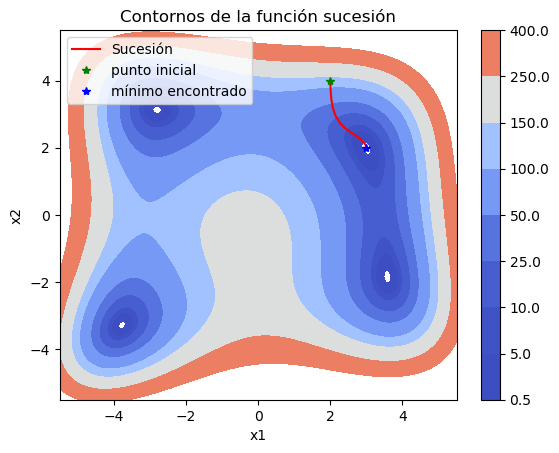

In [64]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Himmelblau,D_Himmelblau,H_Himmelblau,d_min,d_max,eta,x0,tau,N]
imprime(Himmelblau,D_Himmelblau,MRC,argumentos_MRC)

$\Delta_{max}=4$ 

$\mathbf{x}_{0}=[2,4]$

It =  26
x_k       =  [3. 2.]
f(x_k)    =  5.239953726148269e-18
||gk||   =  1.765442905828095e-08
Sí se cumplio el criterio de convergencia


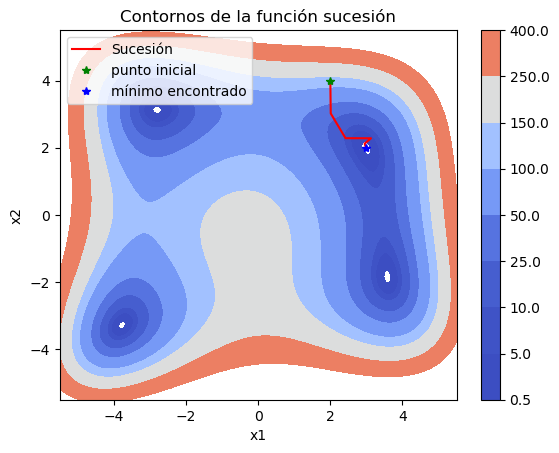

In [65]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Himmelblau,D_Himmelblau,H_Himmelblau,d_min,d_max1,eta,x0,tau,N]
imprime(Himmelblau,D_Himmelblau,MRC,argumentos_MRC)

**Función de Beale**

$\Delta_{max}=0.25$ 

$\mathbf{x}_{0}=[2,3]$

It =  470
x_k       =  [2.99999994 0.49999998]
f(x_k)    =  6.409732080391002e-16
||gk||   =  2.0533950907499887e-08
Sí se cumplio el criterio de convergencia


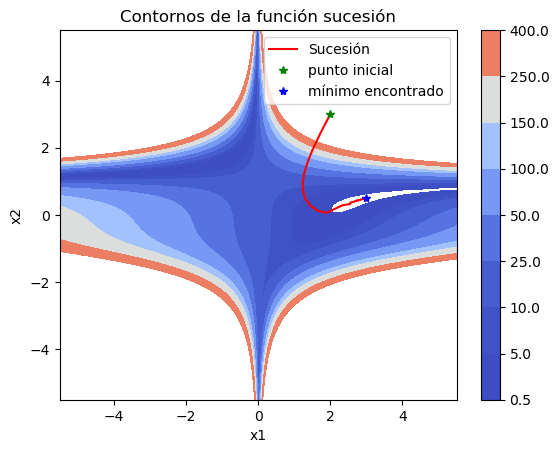

In [66]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Beale,D_Beale,H_Beale,d_min,d_max,eta,x0,tau,N]
imprime(Beale,D_Beale,MRC,argumentos_MRC)

$\Delta_{max}=4$ 

$\mathbf{x}_{0}=[2,3]$

It =  500
x_k       =  [2.99999994 0.49999998]
f(x_k)    =  5.820414374653197e-16
||gk||   =  1.877322464138096e-08
Sí se cumplio el criterio de convergencia


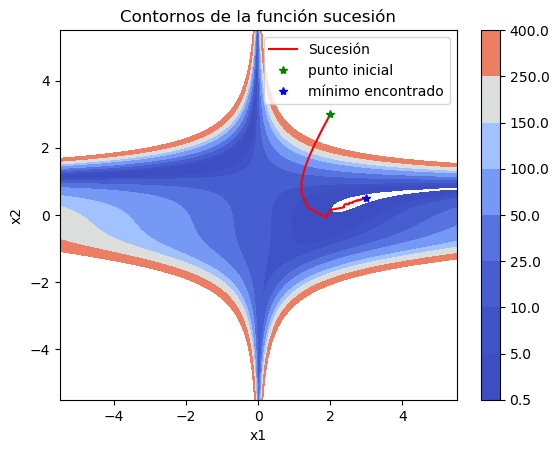

In [67]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Beale,D_Beale,H_Beale,d_min,d_max1,eta,x0,tau,N]
imprime(Beale,D_Beale,MRC,argumentos_MRC)

**Función de Rosenbrock**

$\Delta_{max}=0.25$ 

$\mathbf{x}_{0}=[-1.2,1.0]$

It =  4999
x_k       =  [0.99948421 0.99896823]
f(x_k)    =  2.6606251182198575e-07
||gk||   =  0.000854842001309013


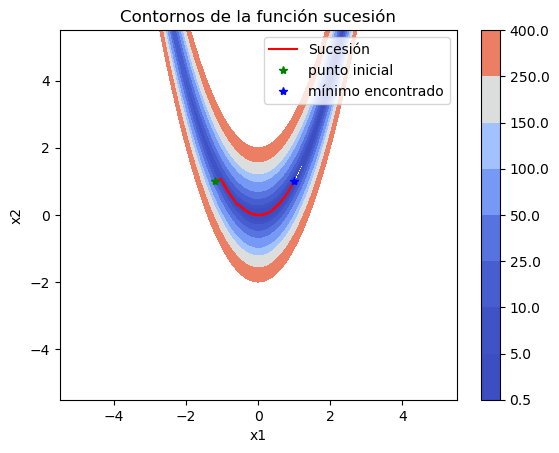

In [74]:
x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

$\Delta_{max}=4$ 

$\mathbf{x}_{0}=[-1.2,1.0]$

It =  4999
x_k       =  [0.99782117 0.99564182]
f(x_k)    =  4.750071558683661e-06
||gk||   =  0.0024892993319235654


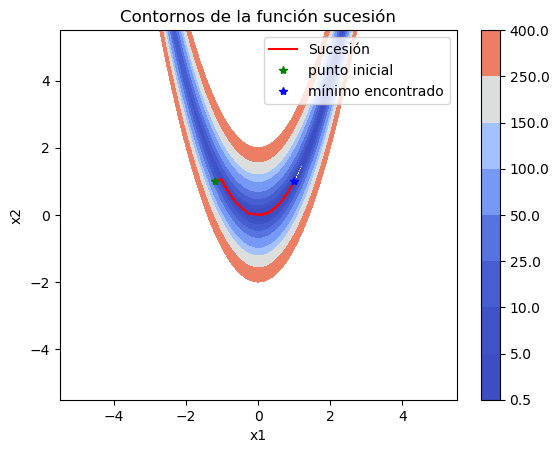

In [73]:
x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max1,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

$\Delta_{max}=0.25$ 

$\mathbf{x}_{0}=[-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0]$

In [75]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

It =  4999
x_k       =  [0.99991359 0.99981815 0.99965193 0.99928001 0.99858261 0.99713417
 0.99428621 0.98855754 0.977202   0.95480158]
f(x_k)    =  0.0006963972204788885
||gk||   =  0.04345157118145676


$\Delta_{max}=4.0$ 

$\mathbf{x}_{0}=[-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0]$

In [69]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max1,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

It =  4999
x_k       =  [0.99989445 0.99979765 0.99957723 0.99917581 0.99832169 0.99666491
 0.99330011 0.98663152 0.97336177 0.94730413]
f(x_k)    =  0.0009507530147213678
||gk||   =  0.04727109584797258


$\Delta_{max}=0.25$ 

$\mathbf{x}_{0}=[-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0]$

In [76]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

It =  4999
x_k       =  [0.99999751 1.00000488 0.99999037 1.00000902 0.99998175 1.00000658
 0.99996458 0.99998148 0.99990819 0.99987108 0.99968775 0.99942497
 0.99880122 0.99763875 0.99523817 0.99050289 0.98103154 0.9623436
 0.92591129 0.85692634]
f(x_k)    =  0.0074095969890082
||gk||   =  0.13473979045417744


$\Delta_{max}=4$ 

$\mathbf{x}_{0}=[-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0]$

In [70]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon)

argumentos_MRC=[Rosenbrock,D_Rosenbrock,H_Rosenbrock,d_min,d_max1,eta,x0,tau,N]
imprime(Rosenbrock,D_Rosenbrock,MRC,argumentos_MRC)

It =  4999
x_k       =  [1.00000115 0.99999608 1.0000044  0.99999091 1.00000477 0.99998221
 0.99999518 0.99995697 0.99994858 0.9998617  0.99975727 0.9994807
 0.99898922 0.99794822 0.9959131  0.99180577 0.98365225 0.96748371
 0.93586789 0.87551266]
f(x_k)    =  0.005542702259011637
||gk||   =  0.10097858962142361


**Función de Hartmann de dimensión 6**

$\Delta_{max}=0.25$ 

$\mathbf{x}_{0}=[0,0,0,0,0,0]$

In [77]:
x0  = np.array([0,0,0,0,0,0])
n   = len(x0)
tau = np.sqrt(n)*(epsilon**(1/3)) #tolerancia distinta

argumentos_MRC=[Hartman,D_Hartman,H_Hartman,d_min,d_max,eta,x0,tau,N]
imprime(Hartman,D_Hartman,MRC,argumentos_MRC)

It =  39
x_k       =  [0.20168984 0.15001049 0.4768729  0.2753325  0.3116515  0.65730055]
f(x_k)    =  -2.21266022196917
||gk||   =  1.1673682740160536e-05
Sí se cumplio el criterio de convergencia


$\Delta_{max}=4$ 

$\mathbf{x}_{0}=[0,0,0,0,0,0]$

In [72]:
x0  = np.array([0,0,0,0,0,0])
n   = len(x0)
tau = np.sqrt(n)*(epsilon**(1/3))#tolerancia distinta

argumentos_MRC=[Hartman,D_Hartman,H_Hartman,d_min,d_max1,eta,x0,tau,N]
imprime(Hartman,D_Hartman,MRC,argumentos_MRC)

It =  4999
x_k       =  [0.2017158  0.14999437 0.47678962 0.27533883 0.31166052 0.65730218]
f(x_k)    =  -2.2126602007286276
||gk||   =  0.0010237433832206207


Resumen:

Himmelbau converge más rapido con $\Delta_{max}=4$ 

Beale converge más rapido con $\Delta_{max}= 0.25$

Rosenbrock no sabemos pues converge pero su gradiente no decrece lo suficiente, en todos casos (con las distintas deltas o con los distinto puntos iniciales) el punto x_k se queda al rededor de 0.999 

Hartamn converge en tan solo 39 iteracioes con $\Delta_{max}=4$